In [2]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
from datetime import datetime

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
1.11.3
0.19.2


In [44]:
#Read the entire dataset
#Using date parser to convert all dates into datetime
df_ad_state_metro_1 = pd.read_pickle('./data/TV_AD_AIRINGS_STATE_METRO_AREA_5.pkl')
df_ad_state_metro_1.head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,cycle,subjects,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59,2016-09-09 00:13:29,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25,2016-09-06 21:58:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25,2016-09-04 16:24:55,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20,2016-08-30 17:59:50,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Tampa-St. Petersburg, FL]",FL,Tampa-St. Petersburg
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22,2016-09-06 07:02:52,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas


In [45]:
#Checking states again
df_ad_state_metro_1['state'].unique()

array(['NV', 'NC', 'FL', 'OH', 'IA', 'PA', 'CO', 'WI', 'National', 'AZ',
       'NH', 'VA', 'NY'], dtype=object)

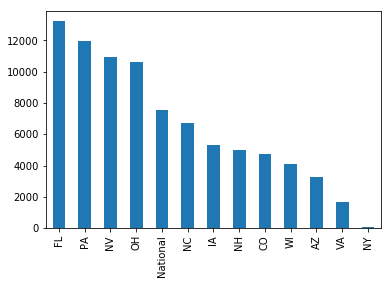

In [46]:
#First plot
#Number of ads by state


df_ad_state_metro_1['state'].value_counts().plot(kind='bar')

In [47]:
#Checking the variability in ad duration to see if we need to consider it to 
#determine ad volume
df_ad_state_metro_1['ad_duration_secs'].unique()

array([  30.,   93.,   36.,   89.,   57.,   80.,   15.,   70.,   60.,
         68.,   42.,   43.,   38.,   45.,   63.,   28.,   86.,   69.,
         81.,   59.,   31.,  105.,  103.,  118.,   88.,   19.,   76.,
         61.,   79.,   32.,   29.,   71.,  125.,  137.,  124.,   67.,
         56.,   55.,   33.,   94.,   37.,   91.,   35.,   87.,   65.,
         66.,   50.,  184.,   97.,   54.,  180.,  140.,  161.,   18.,
         40.,   83.,   78.,   84.,   85.,   62.,  120.,   75.])

In [48]:
df_ad_state_metro_1['ad_duration_secs'].sum()

2825647.0

In [49]:
df_ad_state_metro_1['ad_duration_secs'].value_counts()
#Since there are ads with varying duration, will have to include duration 

30.0     65870
60.0      5850
29.0      4890
31.0      2666
32.0      2552
15.0       840
62.0       559
61.0       294
84.0       232
91.0       193
120.0      141
63.0       115
37.0       108
85.0        91
54.0        85
70.0        62
93.0        57
36.0        53
81.0        46
75.0        38
124.0       33
55.0        25
69.0        25
43.0        22
180.0       21
65.0        20
88.0        19
89.0        18
19.0        18
57.0        16
         ...  
86.0        14
67.0        12
40.0        12
161.0       10
97.0         8
68.0         7
76.0         6
137.0        6
59.0         6
33.0         6
71.0         5
35.0         5
140.0        5
28.0         5
125.0        4
56.0         4
83.0         3
94.0         3
105.0        3
184.0        3
103.0        2
42.0         2
87.0         2
78.0         1
50.0         1
18.0         1
66.0         1
38.0         1
79.0         1
80.0         1
Name: ad_duration_secs, dtype: int64

In [50]:

#Since there are ads with varying duration, will have to include duration 
df_ad_state_metro_2 = df_ad_state_metro_1.copy().groupby('state')['ad_duration_secs'].sum().reset_index()
df_ad_state_metro_2.sort_values('ad_duration_secs', ascending=False, inplace=True)

In [51]:
df_ad_state_metro_2

,state,ad_duration_secs
2,FL,434766.0
10,PA,387274.0
6,NV,370905.0
9,OH,351404.0
8,National,279262.0
4,NC,214829.0
3,IA,179859.0
5,NH,161872.0
1,CO,152241.0
12,WI,132487.0


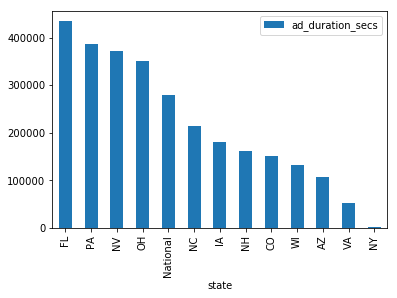

In [13]:
df_ad_state_metro_2.plot(x='state', y='ad_duration_secs', kind='bar')

From above, it is known that the states line up in the same order in terms of count of ads and total duration of ads.

In [52]:
#Looking up candidates remaining in the dataset. Expecting to get 
#Hillary Clinton,Donald Trump, Jill Stein & Gary Johnson since this is after 8/1/2016.
#But find others clubbed along. Need to investigate this
df_ad_state_metro_1['candidates'].value_counts()

Donald Trump                                                                                               41012
Hillary Clinton                                                                                            21727
Donald Trump, Hillary Clinton                                                                              20765
Marco Rubio, Patrick Murphy                                                                                  552
Marco Rubio                                                                                                  348
Donald Trump, Gary Johnson, Gary Johnson, Hillary Clinton                                                    274
Donald Trump, Rob Portman, Ted Strickland                                                                    259
Gary Johnson, Gary Johnson                                                                                    78
Alan Grayson, Hillary Clinton, Marco Rubio, Pat Murphy                                          

In [15]:
#Researching ads where both candidates are there 
df_ad_state_metro_1[df_ad_state_metro_1['candidates'] =='Donald Trump, Hillary Clinton'].head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,...,cycle,subjects,candidates,type,message,date_created,ad_duration_secs,metro_area_state,state,metro_area
4226,5538,5183,KFXA,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Panther Sports Talk,not news,2016-09-10 03:29:45,2016-09-10 03:30:15,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa]",IA,Ceder Rapids-Waterloo-Iowa City-Dublin
4227,5539,5183,KSNV,"Las Vegas, NV",Today,news,2016-09-09 09:40:47,2016-09-09 09:41:17,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
4228,5540,5183,KTNV,"Las Vegas, NV",World News Now,news,2016-09-09 09:59:13,2016-09-09 09:59:43,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas
4229,5541,5183,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-08-30 21:49:29,2016-08-30 21:49:59,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Raleigh-Durham-Fayetteville, NC]",NC,Raleigh-Durham-Fayetteville
4230,5542,5183,KSNV,"Las Vegas, NV",News 3 Live Today,news,2016-09-09 11:58:05,2016-09-09 11:58:35,PolAd_HillaryClinton_DonaldTrump_o5dtl,https://archive.org/embed/PolAd_HillaryClinton...,...,2016.0,"Economy, Jobs, Federal Budget, Taxes, Families","Donald Trump, Hillary Clinton",campaign,mixed,2016-09-12 14:49:00,30.0,"[Las Vegas, NV]",NV,Las Vegas


Used the archive_id to view one of the ads where the candidates is 'Donald Trump, Hillary Clinton' and 
found that it was an ad by Donald Trump. So cannot go by candidates. Instead will have to go by sponsor and sponsortype.The field 'candidates' merely says the names of candidates mentioned in the ad.


In [53]:
#Investigating sponsor
df_ad_state_metro_1['sponsors'].value_counts()

Hillary for America                     37589
Donald J Trump For President            22398
Priorities USA Action                   11201
Rebuilding America Now                   2408
NextGen California Action Committee      1767
Women Vote!                              1102
Future45                                  960
NRA Institute for Legislative Action      791
Reform America Fund                       778
45 Committee                              766
National Rifle Assn                       634
Friends of Patrick Murphy                 553
Donald J. Trump For President             520
Internet Archive                          511
Stop Hillary PAC                          470
Great America PAC                         453
Marco Rubio For Senate 2016               412
MoveOn.org                                412
Purple PAC                                274
Strickland for Senate                     259
Democratic National Cmte                  206
Correct The Record                

From above it seems like sponsor field will lead us to who the ad was for.

In [17]:
#Investigating sponsor_types
df_ad_state_metro_1['sponsor_types'].value_counts()

Multiple                       37613
Candidate Committee            23720
Super PAC                      18690
Non Profit                      1615
Hybrid Super PAC                1457
Unknown                         1063
PAC                              940
Joint Fundraising Committee       28
Corporation                        1
Name: sponsor_types, dtype: int64

From above, Sponsor_types field will not help in determining whether the ad was in favor of the name in 'candidates'
field or against.

In [38]:
#Pulling in state victory margins data 
#df_state_victory_margins = pd.read_csv('./state_victory_margins_data.csv')
df_state_victory_margins = pd.read_csv('./data/state_victory_margins_data.csv')
df_state_victory_margins

,state,winner,Percent margin
0,NV,Hillary Clinton,2.42
1,NC,Donald Trump,3.66
2,FL,Donald Trump,1.19
3,OH,Donald Trump,8.07
4,IA,Donald Trump,9.41
5,PA,Donald Trump,0.72
6,CO,Hillary Clinton,4.91
7,WI,Donald Trump,0.76
8,CA,Hillary Clinton,29.99
9,AZ,Donald Trump,3.50


In [39]:
df_state_victory_margins.sort_values('Percent margin', ascending=False, inplace=True)

In [40]:
df_state_victory_margins

,state,winner,Percent margin
8,CA,Hillary Clinton,29.99
12,NY,Hillary Clinton,22.49
4,IA,Donald Trump,9.41
3,OH,Donald Trump,8.07
11,VA,Hillary Clinton,5.32
6,CO,Hillary Clinton,4.91
1,NC,Donald Trump,3.66
9,AZ,Donald Trump,3.50
0,NV,Hillary Clinton,2.42
2,FL,Donald Trump,1.19


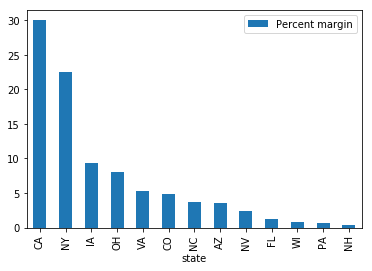

In [41]:
df_state_victory_margins.plot(x='state', y='Percent margin', kind='bar')

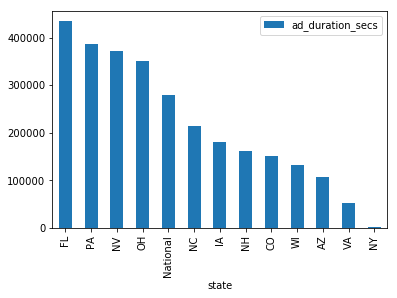

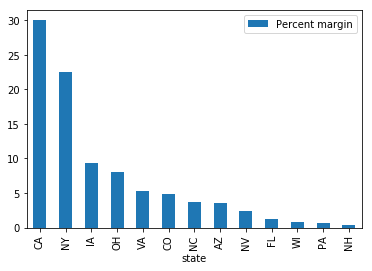

In [54]:
df_ad_state_metro_2.plot(x='state', y='ad_duration_secs', kind='bar')
df_state_victory_margins.plot(x='state', y='Percent margin', kind='bar')
#df_state_victory_margins.plot(x='state', secondary_y=True, y='Percent margin', kind='bar')

In [55]:
#Setting index to state in both dataframes for join 
df_ad_state_metro_2.set_index('state', inplace=True)
df_state_victory_margins.set_index('state', inplace=True)

In [56]:
#joining two tables
merged_df = df_ad_state_metro_2.join(df_state_victory_margins)

In [57]:
merged_df

,ad_duration_secs,winner,Percent margin
state,,,
FL,434766.0,Donald Trump,1.19
PA,387274.0,Donald Trump,0.72
NV,370905.0,Hillary Clinton,2.42
OH,351404.0,Donald Trump,8.07
National,279262.0,NaN,NaN
NC,214829.0,Donald Trump,3.66
IA,179859.0,Donald Trump,9.41
NH,161872.0,Hillary Clinton,0.37
CO,152241.0,Hillary Clinton,4.91


In [58]:
merged_df.reset_index('state', inplace=True)

In [76]:
merged_df.index

RangeIndex(start=0, stop=13, step=1)

In [59]:
merged_df

,state,ad_duration_secs,winner,Percent margin
0,FL,434766.0,Donald Trump,1.19
1,PA,387274.0,Donald Trump,0.72
2,NV,370905.0,Hillary Clinton,2.42
3,OH,351404.0,Donald Trump,8.07
4,National,279262.0,NaN,NaN
5,NC,214829.0,Donald Trump,3.66
6,IA,179859.0,Donald Trump,9.41
7,NH,161872.0,Hillary Clinton,0.37
8,CO,152241.0,Hillary Clinton,4.91
9,WI,132487.0,Donald Trump,0.76


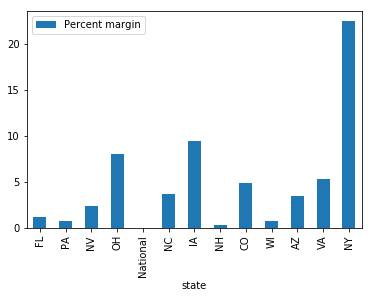

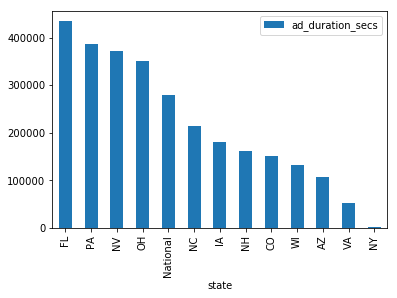

In [60]:
merged_df.plot(x='state', y='Percent margin',  kind='bar')
merged_df.plot(x='state', y='ad_duration_secs',  kind='bar')

Realized that since the scale of the two variables are different, 

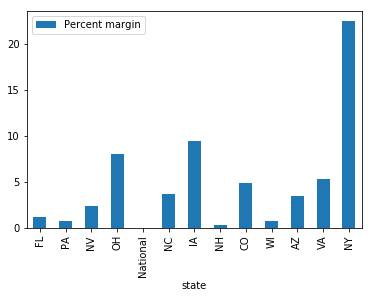

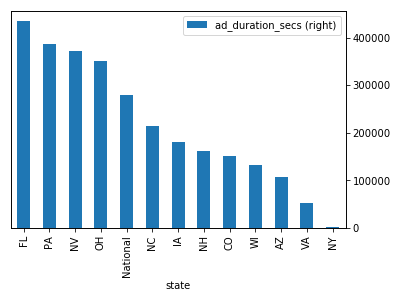

In [61]:
merged_df.plot(x='state', y='Percent margin',  kind='bar')
merged_df.plot(x='state', secondary_y=True, y='ad_duration_secs',  kind='bar')